In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [24]:
bcg_coords = pd.read_csv("BCG_coords.txt", names = ['id', 'ra','dec'], delim_whitespace = True)

In [25]:
cdfs_irac = pd.read_csv("cdfs_irac.csv")
es1_irac = pd.read_csv("es1_irac.csv")
xmm_irac = pd.read_csv("xmm_irac.csv")

In [26]:
cols = ['ra_01', 'dec_01', 'flux_kr_36', 'uncf_kr_36', 'flux_kr_45', 'uncf_kr_45',
                      'flux_kr_58', 'uncf_kr_58', 'flux_kr_80', 'uncf_kr_80']
cdfs_irac = cdfs_irac[cols]
es1_irac = es1_irac[cols]
xmm_irac = xmm_irac[cols]
irac_fluxes = pd.concat([cdfs_irac, es1_irac, xmm_irac],ignore_index=True)
irac_fluxes = irac_fluxes.rename(columns = {"ra_01":"ra", "dec_01": "dec"})

In [32]:
irac_fluxes['id'] = np.zeros(len(irac_fluxes))
for ind,row in bcg_coords.iterrows():
    irac_fluxes.loc[irac_fluxes['ra'] == row['ra'], 'id'] = row['id']

In [115]:
flux_58_nan = []
flux_80_nan = []
for ind,row in irac_fluxes.iterrows():
    if(pd.isnull(row['flux_kr_58'])):
        flux_58_nan.append((ind,row['id']))
        
    if(pd.isnull(row['flux_kr_80'])):
        flux_80_nan.append((ind,row['id']))

In [116]:
for i in flux_58_nan:
    irac_fluxes['flux_kr_58'].values[i[0]] = 43
for i in flux_80_nan:
    irac_fluxes['flux_kr_80'].values[i[0]] = 40

In [117]:
irac_fluxes['f80/f45'] = irac_fluxes['flux_kr_80']/irac_fluxes['flux_kr_45']
irac_fluxes['f58/f36'] = irac_fluxes['flux_kr_58']/irac_fluxes['flux_kr_36']

irac_fluxes['f80/f45_err'] = irac_fluxes['f80/f45']*np.sqrt((irac_fluxes['uncf_kr_80']/irac_fluxes['flux_kr_80'])**2 + 
                                            (irac_fluxes['uncf_kr_45']/irac_fluxes['flux_kr_45'])**2)
irac_fluxes['f58/f36_err'] = irac_fluxes['f58/f36']*np.sqrt((irac_fluxes['uncf_kr_58']/irac_fluxes['flux_kr_58'])**2 + 
                                            (irac_fluxes['uncf_kr_36']/irac_fluxes['flux_kr_36'])**2)

In [118]:
# err_ind_nan = []
# for ind,row in irac_fluxes.iterrows():
#     if (pd.isnull(row['f80/f45_err'])):
#         err_ind_nan.append(ind)
#     if (pd.isnull(row['f58/f36_err'])):
#         err_ind_nan.append(ind)

In [119]:
# for ind in err_ind_nan:
#     irac_fluxes['f80/f45_err'].values[ind] = 0
#     irac_fluxes['f58/f36_err'].values[ind] = 0

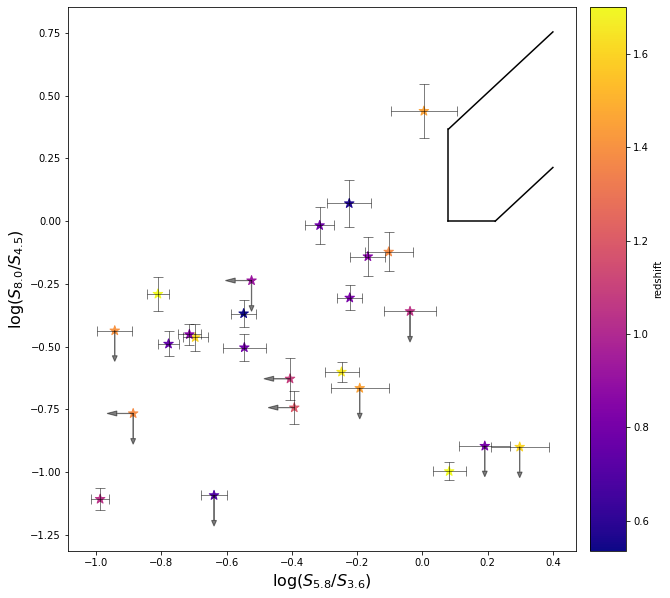

In [145]:
fig, ax = plt.subplots(1, figsize = (10,10))

## AGN regime
xvals = np.linspace(0.08, 0.4, num=500)
ax.plot(xvals, xvals*1.21 + 0.27, color='k')
xvals = np.linspace(0.27/1.21, 0.4, num=300)
ax.plot(xvals, xvals*1.21 - 0.27, color='k')
ax.plot(np.ones(100)*0.08, np.linspace(0, 1.21*0.08+0.27, num=100), color='k')
ax.plot(np.linspace(0.08, 0.27/1.21, num=100), np.zeros(100), color='k')

im = ax.scatter(np.log(irac_fluxes['f58/f36']), np.log(irac_fluxes['f80/f45']), marker = '*', c = irac_fluxes['redshift'], s =100, cmap = 'plasma')
ax.errorbar(np.log(irac_fluxes['f58/f36']), np.log(irac_fluxes['f80/f45']), xerr = irac_fluxes['f58/f36_err'], yerr = irac_fluxes['f80/f45_err'], ls = 'none', ecolor = 'black', alpha = 0.5,solid_capstyle='projecting', capsize=5, elinewidth = 1)

for i, txt in enumerate(irac_fluxes['id']):
#     ax.annotate(txt, (x5[i], y5[i]))
    if txt in right_arrows:
        ax.arrow(np.log(irac_fluxes['f58/f36'][i]), np.log(irac_fluxes['f80/f45'][i]), dx = -0.05, dy = 0, head_width=0.02, alpha = 0.5, color = 'black')
    if txt in up_arrows:
        ax.arrow(np.log(irac_fluxes['f58/f36'][i]), np.log(irac_fluxes['f80/f45'][i]), dx = 0, dy = -0.1, head_width=0.015, alpha = 0.5, color = 'black')
plt.xlabel('log($S_{5.8}/S_{3.6}$)', fontsize = 16)
plt.ylabel('log($S_{8.0}/S_{4.5}$)', fontsize = 16)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="7%", pad=0.2)
cbar = fig.colorbar(im, cax=cax);
cbar.ax.set_ylabel('redshift')
plt.savefig("/Users/arames52/Desktop/agn_contamination.jpg", dpi = 300)

In [107]:
right_arrows = []
up_arrows = []
for i in flux_58_nan:
    right_arrows.append(i[1])
for i in flux_80_nan:
    up_arrows.append(i[1])

In [128]:
BCGs = ['CDFS-18','CDFS-19','ES1-12','ES1-18','ES1-25','ES1-26','ES1-34','ES1-35',
'ES1_z_0.88','ES1_z_0.99','ES1_z_0.99b','ES1_z_1.04','ES1_z_1.38','ES1_z_1.40','ES1_z_1.60',
'ES1_z_1.65','ES1_z_1.70','XMM-11','XMM-19','XMM-27','XMM-29','XMM-30','XMM_113',
'XMM_z_0.81','XMM_z_0.9','XMM_z_1.0']
redshift = [0.813, 0.69484, 0.74, 0.8068, 1.08807, 0.85192, 1.7, 1.7, 0.56395, 1.19372, 0.9188, 1.04,
            1.38, 1.4, 1.6, 1.65, 1.7, 0.79, 1.04789, 1.38, 1.45, 1.45, 1.6, 0.7827207, 0.84957, 0.5352355]
z_dict = {}
for key, value3 in zip(BCGs, redshift):
    z_dict[key] = value3

In [133]:
irac_fluxes['redshift'] = np.zeros(len(irac_fluxes))
index = []
for key in z_dict.keys():
    irac_fluxes.loc[irac_fluxes['id'] == key, 'redshift'] = z_dict[key]

In [134]:
irac_fluxes

,ra,dec,flux_kr_36,uncf_kr_36,flux_kr_45,uncf_kr_45,flux_kr_58,uncf_kr_58,flux_kr_80,uncf_kr_80,id,f80/f45,f58/f36,f80/f45_err,f58/f36_err,redshift
0,53.319700,-26.896300,159.39,1.67,127.00,1.94,127.58,6.05,93.59,6.08,CDFS-18,0.736929,0.800427,0.049180,0.038873,0.813000
1,53.483700,-27.259400,176.91,1.71,119.22,1.88,93.43,7.09,40.00,NaN,CDFS-19,0.335514,0.528122,NaN,0.040401,0.694840
2,8.819600,-42.685400,100.41,1.40,72.39,1.72,80.25,6.65,77.69,6.64,ES1_z_0.88,1.073215,0.799223,0.095204,0.067159,0.563950
3,9.419300,-43.652700,63.67,1.18,66.87,1.71,43.00,NaN,31.82,4.30,ES1_z_0.99,0.475849,0.675357,0.065445,NaN,1.193720
4,8.680500,-42.457800,72.58,1.15,50.67,1.51,43.00,NaN,40.00,NaN,ES1_z_0.99b,0.789422,0.592450,NaN,NaN,0.918800
5,8.856400,-42.239800,186.66,1.28,123.38,2.09,69.53,5.17,40.78,5.35,ES1_z_1.04,0.330524,0.372495,0.043722,0.027815,1.040000
6,8.640100,-42.492800,90.46,1.26,82.58,1.73,81.59,6.59,73.09,6.21,ES1_z_1.38,0.885081,0.901946,0.077452,0.073925,1.380000
7,8.298100,-43.498400,85.09,1.26,61.86,1.44,33.15,4.48,40.00,NaN,ES1_z_1.40,0.646621,0.389587,NaN,0.052965,1.400000
8,9.491600,-42.983900,112.97,1.20,100.42,1.46,56.32,4.24,63.21,5.38,ES1_z_1.60,0.629456,0.498539,0.054351,0.037904,1.600000
9,7.968700,-44.438900,161.25,1.79,171.27,2.25,125.86,8.28,93.94,6.98,ES1_z_1.65,0.548491,0.780527,0.041386,0.052075,1.650000


<font size="10">$I(R) \propto e^{-R^{(1/n)}}$